<a href="https://colab.research.google.com/github/salsaagz/Skripsi/blob/main/script/Pengolahan_Data_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect To Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Package**

In [2]:
#!pip install scikit-criteria
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# **Data Citra Satelit Level Grid 1 km**

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Skripsi/Data/Skripsi - DataSkripsiMedianGrid1Km.xlsx')
dataset = data.copy()
dataset.head()

,fid,id,left,top,right,bottom,BUI,NTL,RI,WorldPop,EVI,BuiltArea
0,1,39386,221827.145909,9.850852e+06,222827.145909,9.849852e+06,-0.919415,0.85375,0.784004,0.319812,0.731676,2.0
1,2,39387,221827.145909,9.849852e+06,222827.145909,9.848852e+06,-0.705207,0.85875,0.715515,0.386531,0.603120,5.0
2,3,39388,221827.145909,9.848852e+06,222827.145909,9.847852e+06,-1.033996,0.90500,0.781771,0.524225,0.773858,2.0
3,4,39389,221827.145909,9.847852e+06,222827.145909,9.846852e+06,-0.974435,1.12875,0.748371,0.805526,0.721377,2.0
4,5,39390,221827.145909,9.846852e+06,222827.145909,9.845852e+06,-1.023917,1.15125,0.775906,0.815542,0.775768,2.0


## **Data Statistics Info**

In [4]:
dataset.fillna(dataset.median(numeric_only=True).round(1), inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49825 entries, 0 to 49824
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fid        49825 non-null  int64  
 1   id         49825 non-null  int64  
 2   left       49825 non-null  float64
 3   top        49825 non-null  float64
 4   right      49825 non-null  float64
 5   bottom     49825 non-null  float64
 6   BUI        49825 non-null  float64
 7   NTL        49825 non-null  float64
 8   RI         49825 non-null  float64
 9   WorldPop   49825 non-null  float64
 10  EVI        49825 non-null  float64
 11  BuiltArea  49825 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 4.6 MB


In [5]:
dataset.describe()

,fid,id,left,top,right,bottom,BUI,NTL,RI,WorldPop,EVI,BuiltArea
count,49825.000000,49825.000000,49825.000000,4.982500e+04,49825.000000,4.982500e+04,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,24913.000000,44984.319619,245587.848367,9.812537e+06,246587.848367,9.811537e+06,-1.017787,0.902708,0.763204,0.693967,0.739166,2.290778
std,14383.382918,20759.393538,88809.267420,5.208981e+04,88809.267420,5.208981e+04,0.176132,0.631765,0.092699,2.813338,0.118148,0.918991
min,1.000000,3621.000000,68827.145909,9.693852e+06,69827.145909,9.692852e+06,-1.382940,0.000000,0.058142,0.032948,-0.370068,1.000000
25%,12457.000000,28067.000000,172827.145909,9.771852e+06,173827.145909,9.770852e+06,-1.128215,0.630000,0.734780,0.174223,0.703278,2.000000
50%,24913.000000,43639.000000,239827.145909,9.814852e+06,240827.145909,9.813852e+06,-1.061238,0.858750,0.787747,0.341146,0.772319,2.000000
75%,37369.000000,60885.000000,313827.145909,9.854852e+06,314827.145909,9.853852e+06,-0.968996,1.111250,0.822268,0.679763,0.814321,2.000000
max,49825.000000,91135.000000,442827.145909,9.919852e+06,443827.145909,9.918852e+06,0.162493,66.018752,0.892793,103.286816,0.892165,10.000000


In [6]:
def VizDist(df,var):
  plt.figure(figsize=(6, 4))

  # Histogram
  plt.subplot(2, 1, 1)
  sns.histplot(df[var], kde=True, color='skyblue')
  plt.xlabel('')
  plt.xticks([])

  # Boxplot
  plt.subplot(2, 1, 2)
  sns.boxplot(x=df[var], width = 0.4)
  plt.tight_layout()
  plt.suptitle('Distribusi Variabel ' + var, y=1.05, fontsize=14,fontweight='bold')
  plt.show()

# Visualize

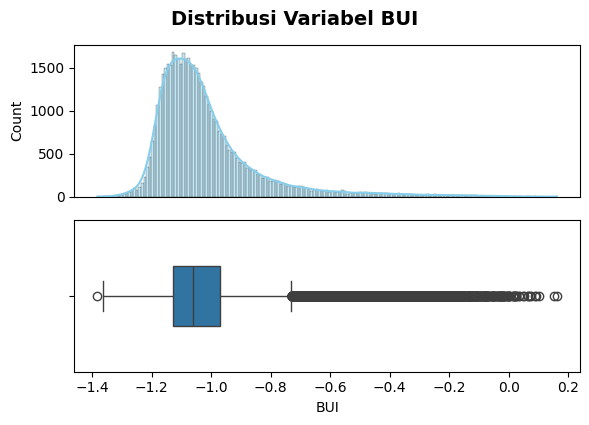

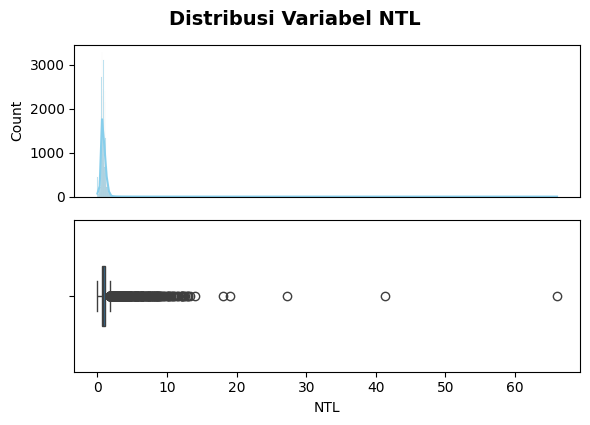

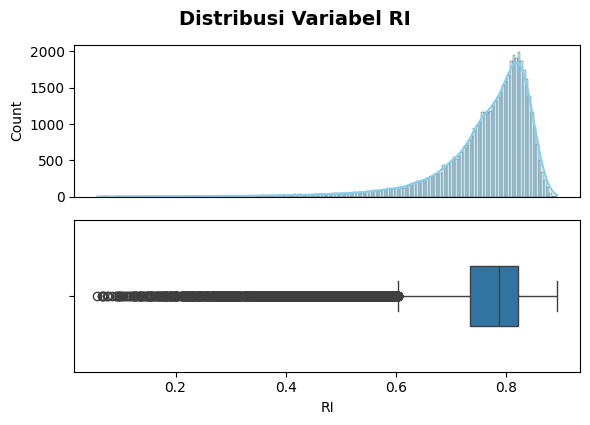

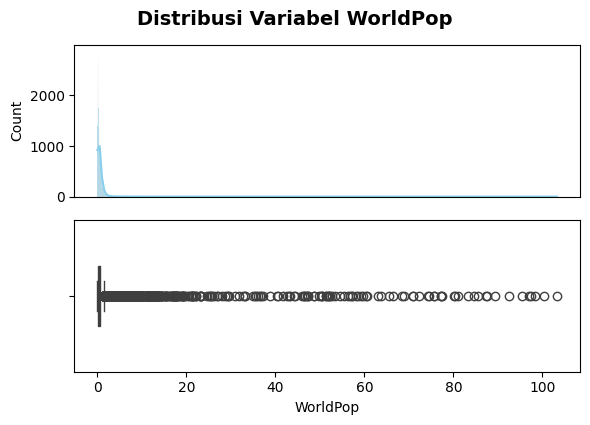

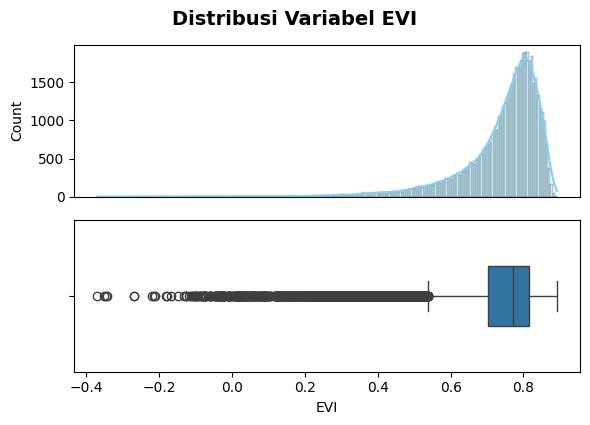

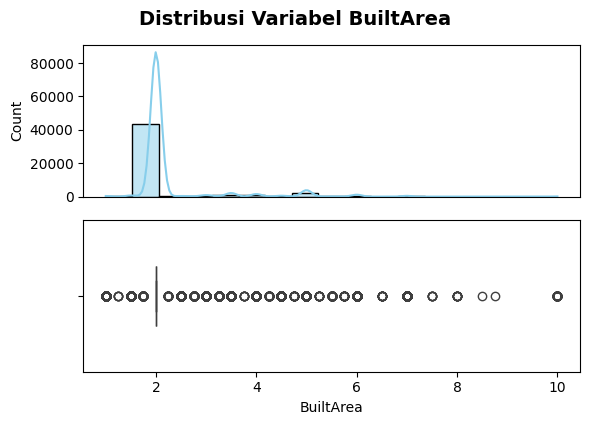

In [7]:
# take the numerical variable
data_num = dataset.drop(['fid', 'id', 'left', 'top', 'right', 'bottom'], axis = 1)

# visualize the distribution
for column in data_num.columns:
  VizDist(dataset, column)

# Transformation

In [8]:
# To Visualize all Variable
def BoxplotAllVar(df, trans):
  plt.figure(figsize=(12, 8))
  df_num = df.select_dtypes(include='number')
  sns.boxplot(data = df_num, width = 0.5, palette = sns.color_palette("pastel"), orient='h')
  plt.title('Boxplot Variabel Setelah Transformasi ' + trans)
  plt.xticks(rotation=90)
  plt.show()

## Min-Max Scaling

In [9]:
def MinMaxScaling(df):
  # selecting variable numeric
  df_num = df.select_dtypes(include='number')

  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(df_num)
  scaled_df = pd.DataFrame(scaled_data, columns=df_num.columns)
  data = df.copy()
  data[df_num.columns] = scaled_df
  return data

def MinMaxSlope(df_slope):
  slope_max = df_slope.max()
  slope_min = df_slope.min()

  result = (slope_max - df_slope)/(slope_max - slope_min)
  return(result)

In [10]:
df_MinMax = MinMaxScaling(data_num)
#df_MinMax['BUI'] = MinMaxSlope(dataset['BUI'])
df_MinMax.describe()

,BUI,NTL,RI,WorldPop,EVI,BuiltArea
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,0.236279,0.013674,0.844739,0.006402,0.878787,0.143420
std,0.113969,0.009569,0.111064,0.027247,0.093602,0.102110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164825,0.009543,0.810683,0.001368,0.850355,0.111111
50%,0.208163,0.013008,0.874143,0.002985,0.905053,0.111111
75%,0.267850,0.016832,0.915503,0.006264,0.938328,0.111111
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-8-0100b66c090b>:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(data = df_num, width = 0.5, palette = sns.color_palette("pastel"), orient='h')


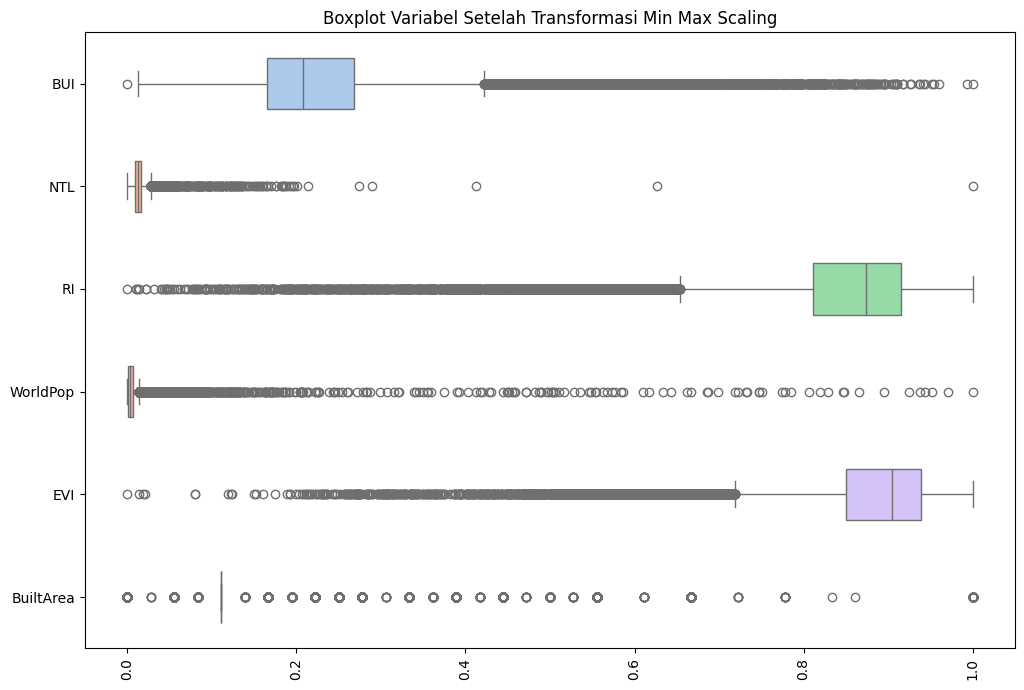

In [11]:
BoxplotAllVar(df_MinMax, 'Min Max Scaling')

## Log Transformation

In [12]:
def LogTransform(data_num):
  small_constant = 1e-5
  df_temp = data_num.select_dtypes(include='number')
  df_transformed = np.log1p(df_temp + small_constant)
  data = data_num.copy()
  data[df_transformed.columns] = df_transformed
  return data

In [13]:
df_LogTransform = LogTransform(data_num)
df_LogTransform.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,BUI,NTL,RI,WorldPop,EVI,BuiltArea
count,15596.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,-2.444076,0.620220,0.565604,0.390799,0.550763,1.165286
std,1.389134,0.197234,0.056953,0.364607,0.075586,0.205888
min,-11.739615,0.000010,0.056524,0.032427,-0.462127,0.693152
25%,-3.224993,0.488586,0.550886,0.160615,0.532560,1.098616
50%,-2.270484,0.619910,0.580962,0.293532,0.572295,1.098616
75%,-1.458858,0.747285,0.600087,0.518659,0.595717,1.098616
max,0.150576,4.204973,0.638059,4.647145,0.637727,2.397896


<ipython-input-8-0100b66c090b>:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(data = df_num, width = 0.5, palette = sns.color_palette("pastel"), orient='h')


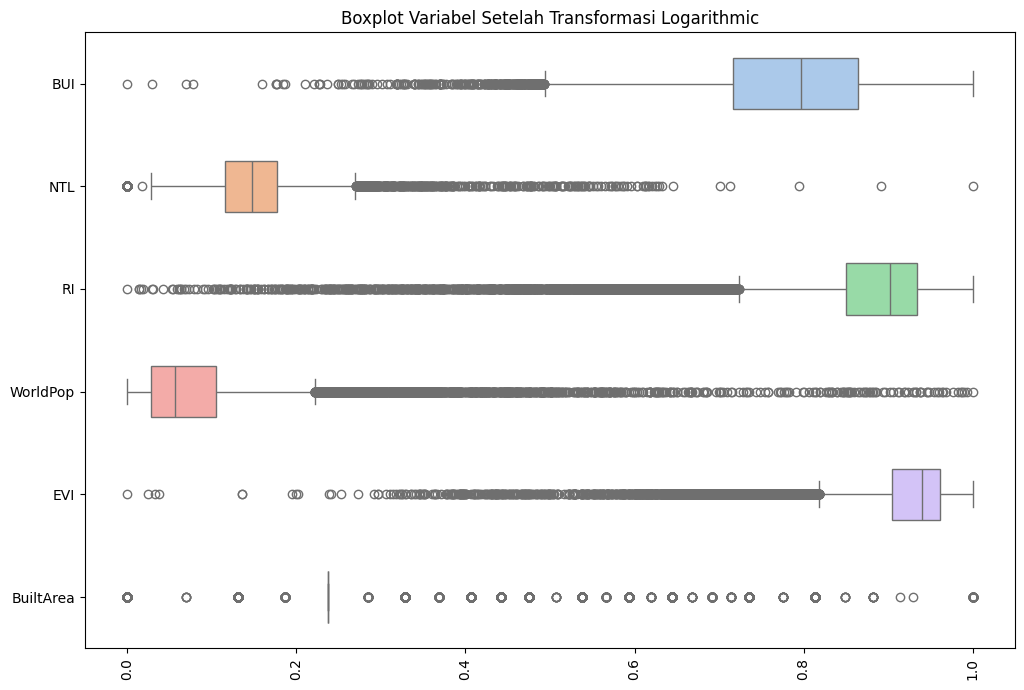

In [14]:
BoxplotAllVar(MinMaxScaling(df_LogTransform), 'Logarithmic')

## YeoJohnson Transformation

In [15]:
from sklearn.preprocessing import PowerTransformer

def YJTransform(df):
  df_temp = df.select_dtypes(include='number')

  pt = PowerTransformer()
  pt.fit(df_temp)
  lambda_values = pt.lambdas_
  trans = pt.transform(df_temp)

  data = df.copy()
  data[df_temp.columns] = trans

  return data, lambda_values

In [16]:
df_YJTransform, lambda_values = YJTransform(data_num)
df_YJTransform.describe()

,BUI,NTL,RI,WorldPop,EVI,BuiltArea
count,4.982500e+04,4.982500e+04,4.982500e+04,4.982500e+04,4.982500e+04,4.982500e+04
mean,1.414668e-16,8.988562e-16,2.671042e-16,-5.704307e-17,-1.437485e-16,-4.473318e-14
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-4.819789e+00,-3.956975e+00,-2.314344e+00,-1.763368e+00,-2.261556e+00,-8.882314e+00
25%,-7.177350e-01,-6.637547e-01,-7.054905e-01,-8.339236e-01,-7.012032e-01,-2.445315e-01
50%,-6.323915e-02,6.069098e-02,7.920413e-02,-9.122451e-02,9.864496e-02,-2.445315e-01
75%,6.381403e-01,7.079778e-01,7.668380e-01,7.934120e-01,7.507954e-01,-2.445315e-01
max,2.343289e+00,7.540336e+00,2.771998e+00,2.351321e+00,2.404711e+00,2.737671e+00


In [17]:
lambda_values

array([-5.51636042, -0.63451143, 13.19249943, -1.99708708, 10.41996124,
       -3.32998853])

<ipython-input-8-0100b66c090b>:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.boxplot(data = df_num, width = 0.5, palette = sns.color_palette("pastel"), orient='h')


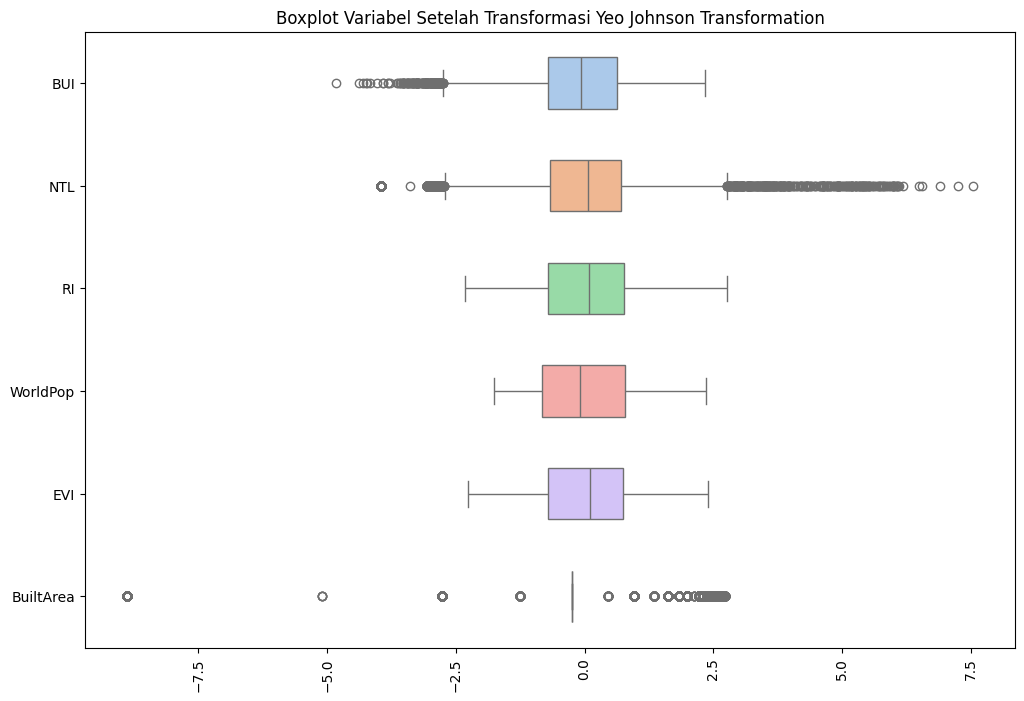

In [18]:
BoxplotAllVar(df_YJTransform, 'Yeo Johnson Transformation')

In [19]:
databaru = pd.read_excel('/content/drive/MyDrive/Skripsi/Data/Data Skripsi/ZS_Kecamatan 2023 (Cleaned).xlsx')
databaru.head()
databaru_Transform, lambda_values = YJTransform(databaru)
databaru_Transform.info()
#export data to excel
databaru_Transform.to_excel(r'/content/drive/MyDrive/Skripsi/Data/DataZSKecamatanTransform.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fid                 150 non-null    float64
 1   NAMOBJ              150 non-null    object 
 2   WADMKK              150 non-null    object 
 3   WADMPR              150 non-null    object 
 4   SHAPE_Leng          150 non-null    float64
 5   SHAPE_Area          150 non-null    float64
 6   Population Density  150 non-null    float64
 7   RI                  150 non-null    float64
 8   NTL                 150 non-null    float64
 9   BUI                 150 non-null    float64
 10  EVI                 150 non-null    float64
 11  BA                  150 non-null    float64
dtypes: float64(9), object(3)
memory usage: 14.2+ KB


In [20]:
import math
from scipy.stats import kstest
from scipy.stats import lognorm

#perform Kolmogorov-Smirnov test for normality
normtestBUI = kstest(df_YJTransform['BUI'], 'norm')
normtestNTL = kstest(df_YJTransform['NTL'], 'norm')
normtestRI = kstest(df_YJTransform['RI'], 'norm')
normtestWorldPop = kstest(df_YJTransform['WorldPop'], 'norm')
normtestEVI = kstest(df_YJTransform['EVI'], 'norm')
normtestBuiltArea = kstest(df_YJTransform['BuiltArea'], 'norm')

print('BUI = ', normtestBUI)
print('NTL = ',normtestNTL)
print('RI = ',normtestRI)
print('WorldPop = ',normtestWorldPop)
print('EVI = ',normtestEVI)
print('BuiltArea = ',normtestBuiltArea)

BUI =  KstestResult(statistic=0.027832497016960778, pvalue=5.78847578821741e-34, statistic_location=0.14452239369539216, statistic_sign=1)
NTL =  KstestResult(statistic=0.08152533945507952, pvalue=1.6365473121762067e-288, statistic_location=-0.9673546244566226, statistic_sign=-1)
RI =  KstestResult(statistic=0.04528921017201737, pvalue=3.0261431484728895e-89, statistic_location=0.41827822656614405, statistic_sign=-1)
WorldPop =  KstestResult(statistic=0.06240041899588811, pvalue=4.2007671718277016e-169, statistic_location=-0.5596311934346708, statistic_sign=1)
EVI =  KstestResult(statistic=0.040973423415176846, pvalue=4.048116015326363e-73, statistic_location=0.22680938072032333, statistic_sign=-1)
BuiltArea =  KstestResult(statistic=0.4774132761500021, pvalue=0.0, statistic_location=-0.24453150124503992, statistic_sign=1)


In [ ]:
#export data to excel
df_YJTransform.to_excel(r'/content/drive/MyDrive/Skripsi/Data/DataSkripsiGridTransform.xlsx')

# Correlation Plot

In [21]:
def CorPlot(df):
  df_temp = df.select_dtypes(include='number')
  correlation_matrix = df_temp.corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt=".2f", linewidths=.25, annot_kws={"size": 8})
  plt.title('Correlation Plot')
  plt.show()

  # print(correlation_matrix)

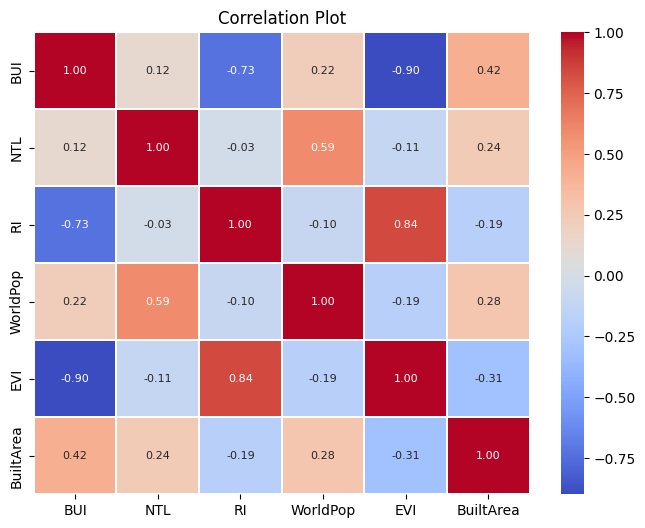

In [22]:
CorPlot(data_num)

In [23]:
df_temp = df_YJTransform.select_dtypes(include='number')
correlation_matrix = df_temp.corr()
correlation_matrix

,BUI,NTL,RI,WorldPop,EVI,BuiltArea
BUI,1.000000,0.014679,-0.726669,0.198647,-0.877869,0.237741
NTL,0.014679,1.000000,0.038906,0.221907,-0.072446,0.171125
RI,-0.726669,0.038906,1.000000,0.071311,0.881347,-0.117921
WorldPop,0.198647,0.221907,0.071311,1.000000,-0.127711,0.041719
EVI,-0.877869,-0.072446,0.881347,-0.127711,1.000000,-0.188613
BuiltArea,0.237741,0.171125,-0.117921,0.041719,-0.188613,1.000000


# **Data Ground Truth**

In [24]:
dataKabKot = pd.read_excel('/content/drive/MyDrive/Skripsi/Data/DataSkripsiMedianKabKotFix.xlsx')
groundtruth = dataKabKot.copy()
groundtruth.head()

,Nama Kabupaten/Kota,World Pop,NTL,RI,BUI,EVI,Built Area,Konektivitas,Aksesibilitas
0,KAB KERINCI,0.283614,0.068128,0.880302,-0.298896,0.445069,2,16.054159,0.500151
1,KAB MERANGIN,0.348403,0.140179,0.860759,-1.060967,0.436053,2,12.678571,0.701192
2,KAB SAROLANGUN,0.268973,0.277649,0.858763,-1.138800,0.434254,2,13.396624,1.191832
3,KAB BATANG HARI,0.225002,0.085389,0.815465,-1.000030,0.441009,2,14.818763,1.489322
4,KAB MUARO JAMBI,0.468553,0.595000,0.815560,-0.968077,0.443351,2,13.768116,1.738028


In [25]:
groundtruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nama Kabupaten/Kota  11 non-null     object 
 1   World Pop            11 non-null     float64
 2   NTL                  11 non-null     float64
 3   RI                   11 non-null     float64
 4   BUI                  11 non-null     float64
 5   EVI                  11 non-null     float64
 6   Built Area           11 non-null     int64  
 7   Konektivitas         11 non-null     float64
 8   Aksesibilitas        11 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 920.0+ bytes


In [26]:
groundtruth.describe()

,World Pop,NTL,RI,BUI,EVI,Built Area,Konektivitas,Aksesibilitas
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2.809859,0.530368,0.784947,-0.876244,0.431776,2.454545,14.996709,1.397330
std,8.165678,0.881911,0.163218,0.288749,0.044489,1.507557,3.034173,0.801645
min,0.225002,0.043032,0.309907,-1.138800,0.300000,2.000000,11.675127,0.500151
25%,0.286856,0.076758,0.798413,-1.018711,0.436875,2.000000,13.037598,0.863476
50%,0.348403,0.260298,0.849562,-0.968077,0.443351,2.000000,14.818763,1.255381
75%,0.442056,0.597500,0.859761,-0.931692,0.447745,2.000000,15.719387,1.671905
max,27.429049,3.100000,0.880302,-0.298896,0.460956,7.000000,21.656051,3.435048


# **Visualize**

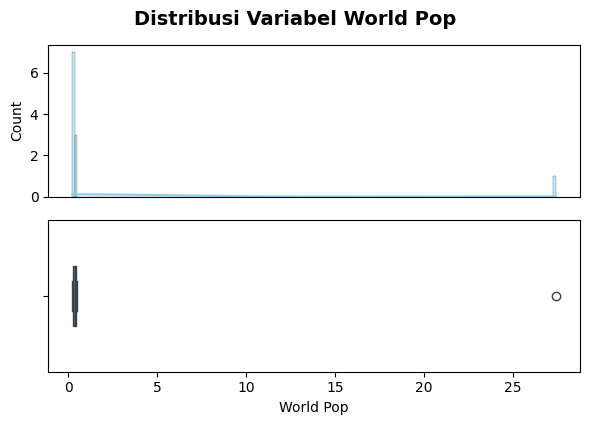

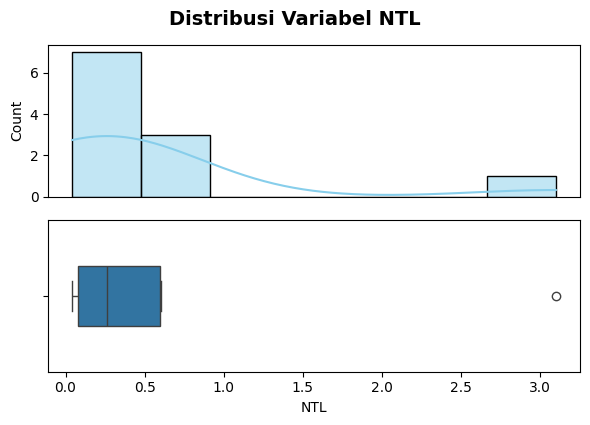

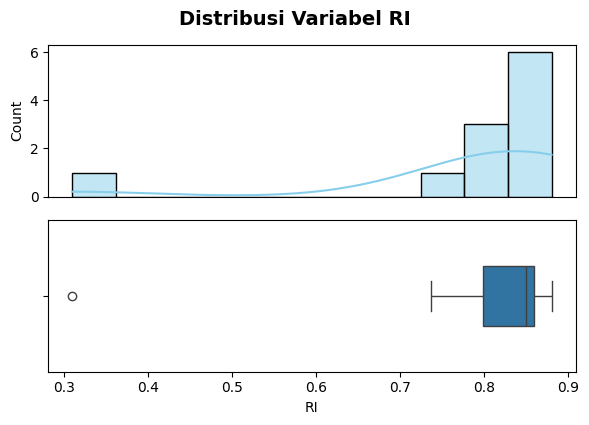

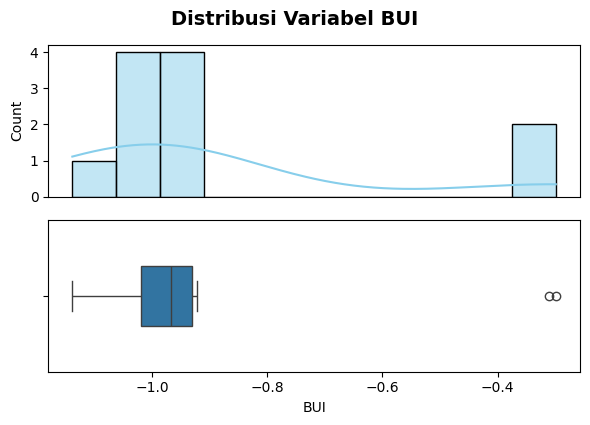

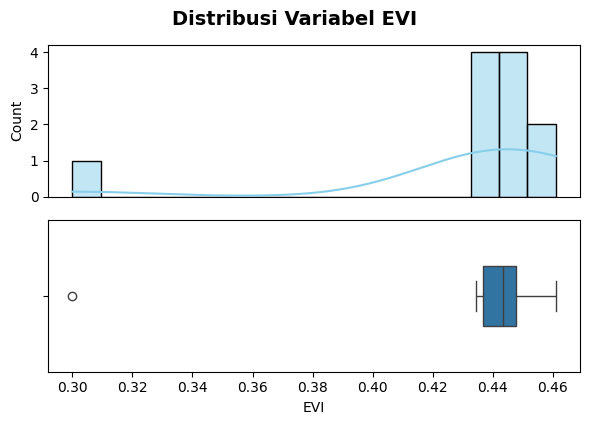

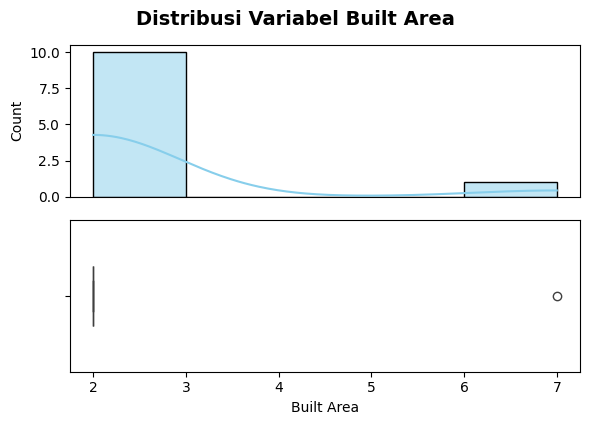

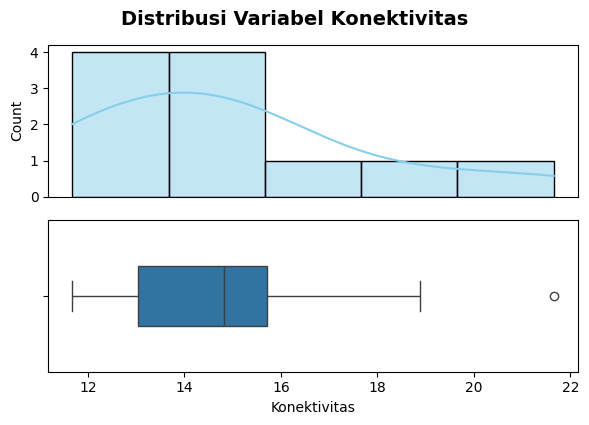

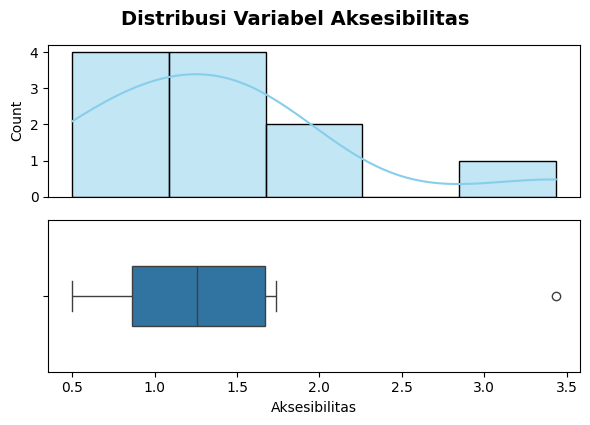

In [27]:
# drop non numerical variable
groundtruth_num = groundtruth.drop(['Nama Kabupaten/Kota'], axis = 1)

# visualize the distribution
for column in groundtruth_num.columns:
  VizDist(groundtruth, column)

# **Transformation**

In [28]:
from sklearn.preprocessing import PowerTransformer

def YJTransform(groundtruth):
  groundtruth_temp = groundtruth.select_dtypes(include='number')

  pt = PowerTransformer()
  pt.fit(groundtruth_temp)
  lambda_values = pt.lambdas_
  trans = pt.transform(groundtruth_temp)

  groundtruth = groundtruth.copy()
  groundtruth[groundtruth_temp.columns] = trans

  return groundtruth, lambda_values

groundtruth_YJTransform, lambda_values = YJTransform(groundtruth_num)
groundtruth_YJTransform.describe()

,World Pop,NTL,RI,BUI,EVI,Built Area,Konektivitas,Aksesibilitas
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,3.128810e-16,-2.693552e-16,-9.083643e-17,-3.128810e-16,1.211152e-16,1.431920e-10,-1.088019e-14,-7.872491e-16
std,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00
min,-1.119455e+00,-1.195708e+00,-2.235585e+00,-1.711641e+00,-2.336352e+00,-3.162278e-01,-1.500537e+00,-1.728867e+00
25%,-6.286224e-01,-9.546638e-01,-4.738592e-01,-4.839031e-01,-4.001243e-01,-3.162278e-01,-6.446340e-01,-7.362310e-01
50%,-2.199863e-01,2.896284e-03,4.554496e-01,-8.322037e-02,2.958240e-02,-3.162278e-01,1.838174e-01,5.412827e-02
75%,2.788833e-01,9.036442e-01,6.939787e-01,1.666517e-01,3.817173e-01,-3.162278e-01,5.033224e-01,6.339997e-01
max,2.788916e+00,1.946470e+00,1.234947e+00,1.828432e+00,1.721418e+00,3.162278e+00,1.788296e+00,1.959716e+00


<ipython-input-8-0100b66c090b>:5: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(data = df_num, width = 0.5, palette = sns.color_palette("pastel"), orient='h')


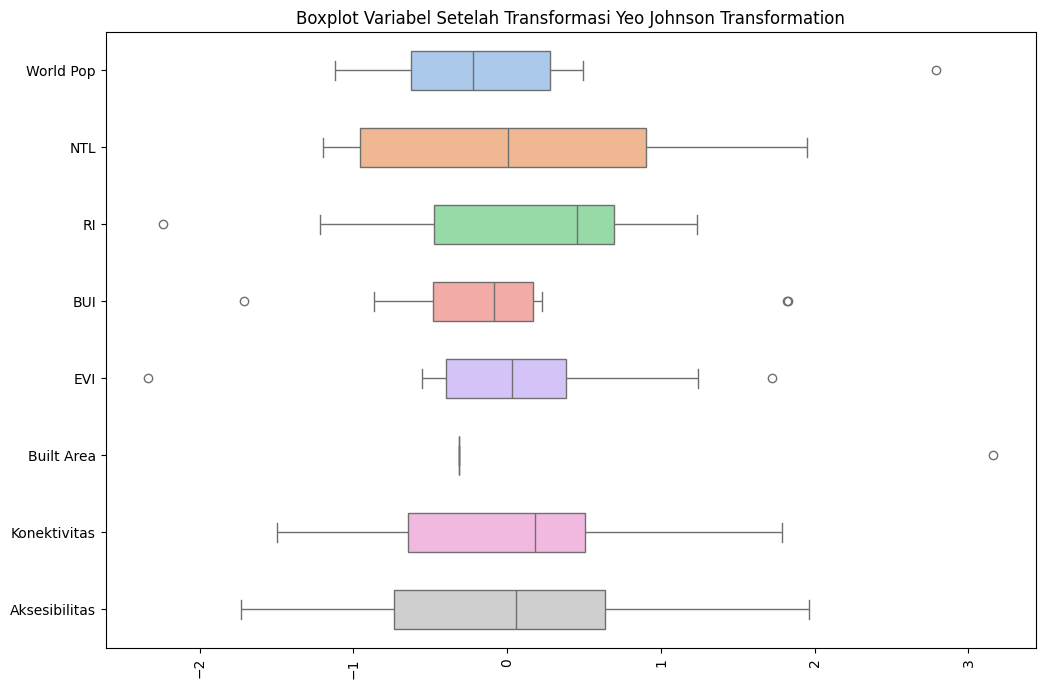

In [29]:
BoxplotAllVar(groundtruth_YJTransform, 'Yeo Johnson Transformation')

In [ ]:
groundtruth_YJTransform.to_excel(r'/content/drive/MyDrive/Skripsi/Data/DataSkripsiGroundTruthTransform.xlsx')

# **Correlation**

In [30]:
def CorPlot(groundtruth_YJTransform):
  gt_temp = groundtruth.select_dtypes(include='number')
  correlation_matrix = gt_temp.corr()

  plt.figure(figsize=(8, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt=".2f", linewidths=.25, annot_kws={"size": 8})
  plt.title('Correlation Plot')
  plt.show()

  #print(correlation_matrix)

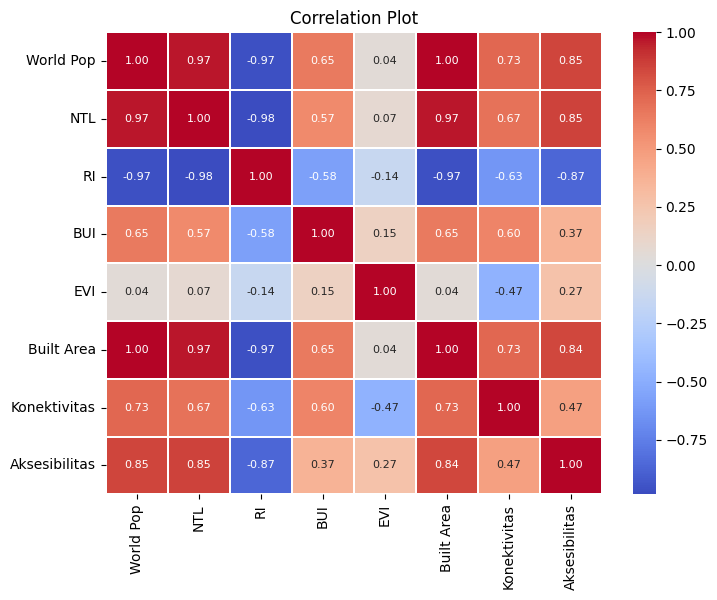

In [31]:
CorPlot(groundtruth_YJTransform)

# **Pearson Correlation**

In [32]:
gt_temp = groundtruth.select_dtypes(include='number')
correlation_matrix = gt_temp.corr()
correlation_matrix

,World Pop,NTL,RI,BUI,EVI,Built Area,Konektivitas,Aksesibilitas
World Pop,1.000000,0.966968,-0.965198,0.647959,0.044694,0.999949,0.726514,0.845870
NTL,0.966968,1.000000,-0.984283,0.574398,0.071597,0.966368,0.674792,0.853563
RI,-0.965198,-0.984283,1.000000,-0.576021,-0.142335,-0.965290,-0.634195,-0.866230
BUI,0.647959,0.574398,-0.576021,1.000000,0.153876,0.649239,0.598927,0.369531
EVI,0.044694,0.071597,-0.142335,0.153876,1.000000,0.044148,-0.465876,0.269354
Built Area,0.999949,0.966368,-0.965290,0.649239,0.044148,1.000000,0.727926,0.843060
Konektivitas,0.726514,0.674792,-0.634195,0.598927,-0.465876,0.727926,1.000000,0.470021
Aksesibilitas,0.845870,0.853563,-0.866230,0.369531,0.269354,0.843060,0.470021,1.000000


In [33]:
#Correlation Test untuk Konektivitas
from scipy.stats.stats import pearsonr
popdensity_cortest = pearsonr(gt_temp['World Pop'], gt_temp['Konektivitas'])
ntl_cortest = pearsonr(gt_temp['NTL'], gt_temp['Konektivitas'])
ri_cortest = pearsonr(gt_temp['RI'], gt_temp['Konektivitas'])
bui_cortest = pearsonr(gt_temp['BUI'], gt_temp['Konektivitas'])
evi_cortest = pearsonr(gt_temp['EVI'], gt_temp['Konektivitas'])
ba_cortest = pearsonr(gt_temp['Built Area'], gt_temp['Konektivitas'])

print ('P-value untuk Variabel Konektivitas')
print ('p-value population Density = ', popdensity_cortest)
print ('p-value NTL = ', ntl_cortest)
print ('p-value RI = ', ri_cortest)
print ('p-value BUI = ', bui_cortest)
print ('p-value EVI = ', evi_cortest)
print ('p-value BA = ', ba_cortest)


P-value untuk Variabel Konektivitas
p-value population Density =  PearsonRResult(statistic=0.7265141361599675, pvalue=0.0113322068842441)
p-value NTL =  PearsonRResult(statistic=0.6747915240334577, pvalue=0.022734815492606048)
p-value RI =  PearsonRResult(statistic=-0.6341951586807282, pvalue=0.03611418460281933)
p-value BUI =  PearsonRResult(statistic=0.5989274739789671, pvalue=0.05152877814967467)
p-value EVI =  PearsonRResult(statistic=-0.465875908304269, pvalue=0.14867669576440326)
p-value BA =  PearsonRResult(statistic=0.7279260762007518, pvalue=0.01109621290794477)


<ipython-input-33-8e031c220f71>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [34]:
#Correlation Test untuk Aksesibilitas
from scipy.stats.stats import pearsonr
popdensity_cortest2 = pearsonr(gt_temp['World Pop'], gt_temp['Aksesibilitas'])
ntl_cortest2 = pearsonr(gt_temp['NTL'], gt_temp['Aksesibilitas'])
ri_cortest2 = pearsonr(gt_temp['RI'], gt_temp['Aksesibilitas'])
bui_cortest2 = pearsonr(gt_temp['BUI'], gt_temp['Aksesibilitas'])
evi_cortest2 = pearsonr(gt_temp['EVI'], gt_temp['Aksesibilitas'])
ba_cortest2 = pearsonr(gt_temp['Built Area'], gt_temp['Aksesibilitas'])

print ('P-value untuk Variabel Aksesibilitas')
print ('p-value population Density = ', popdensity_cortest2)
print ('p-value NTL = ', ntl_cortest2)
print ('p-value RI = ', ri_cortest2)
print ('p-value BUI = ', bui_cortest2)
print ('p-value EVI = ', evi_cortest2)
print ('p-value BA = ', ba_cortest2)


P-value untuk Variabel Aksesibilitas
p-value population Density =  PearsonRResult(statistic=0.8458697312829933, pvalue=0.0010332573255865593)
p-value NTL =  PearsonRResult(statistic=0.8535632164931065, pvalue=0.0008302432106381472)
p-value RI =  PearsonRResult(statistic=-0.8662295701159288, pvalue=0.0005632598841561185)
p-value BUI =  PearsonRResult(statistic=0.3695307944571652, pvalue=0.26335617285161955)
p-value EVI =  PearsonRResult(statistic=0.26935409106672836, pvalue=0.4231542881164424)
p-value BA =  PearsonRResult(statistic=0.84306015661569, pvalue=0.0011159844432889721)


<ipython-input-34-1e2e070bbf83>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
correlation_matrix.to_excel(r'/content/drive/MyDrive/Skripsi/Data/Bobot.xlsx')

# **Bobot Untuk Perhitungan konektivitas**

In [35]:
KvWorldPop = groundtruth['Konektivitas'].corr(groundtruth['World Pop'])
KvNTL = groundtruth['Konektivitas'].corr(groundtruth['NTL'])
KvRI = groundtruth['Konektivitas'].corr(groundtruth['RI'])
KvBUI = groundtruth['Konektivitas'].corr(groundtruth['BUI'])
KvEVI = groundtruth['Konektivitas'].corr(groundtruth['EVI'])

KvTotal = sum([abs(KvWorldPop), abs(KvNTL), abs(KvRI), abs(KvBUI), abs(KvEVI)])

WgKvWorldPop = KvWorldPop/KvTotal
WgKvNTL = KvNTL/KvTotal
WgKvRI = KvRI/KvTotal
WgKvBUI = KvBUI/KvTotal
WgKvEVI = KvEVI/KvTotal

#print(WgKvEVI)

# **Bobot Untuk Perhitungan Aksesibilitas**

In [36]:
AsWorldPop = groundtruth['Aksesibilitas'].corr(groundtruth['World Pop'])
AsNTL = groundtruth['Aksesibilitas'].corr(groundtruth['NTL'])
AsRI = groundtruth['Aksesibilitas'].corr(groundtruth['RI'])
AsBUI = groundtruth['Aksesibilitas'].corr(groundtruth['BUI'])
AsEVI = groundtruth['Aksesibilitas'].corr(groundtruth['EVI'])

AsTotal = sum([abs(AsWorldPop), abs(AsNTL), abs(AsRI), abs(AsBUI), abs(AsEVI)])

WgAsWorldPop = AsWorldPop/AsTotal
WgAsNTL = AsNTL/AsTotal
WgAsRI = AsRI/AsTotal
WgAsBUI = AsBUI/AsTotal
WgAsEVI = AsEVI/AsTotal

#print(WgAsEVI)

\# **Multi-Criteria Decision Analysis**

Pengolahan dilakukan di Excel

## **Weighted Sum Model**

## **Weighted Product Model**

## **Multi-Criteria Compromise Ranking (VIKOR)**

# **EVALUASI HASIL ESTIMASI**

In [ ]:
# Data
data_eval = pd.read_excel('/content/drive/MyDrive/Skripsi/Data/Skripsi - Standardize Hasil Estimasi MCDA Kabkot.xlsx')
data_eval.describe()

,WSMKonektivitas,WPMKonektivitas,VikorKonektivitas,WSMAksesibilitas,WPMAksesibilitas,VikorAksesibilitas,IGKJ,IGAJ
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.459941,0.437623,0.460490,0.456023,0.437647,0.456187,0.498038,0.502005
std,0.245246,0.186097,0.246542,0.228963,0.186183,0.223779,0.304248,0.298204
min,0.144940,0.378305,0.148458,0.115267,0.373693,0.105627,0.076257,0.049634
25%,0.276441,0.381298,0.270199,0.333495,0.378344,0.359062,0.272932,0.255146
50%,0.462586,0.382121,0.463008,0.393361,0.379550,0.443663,0.569564,0.520580
75%,0.608253,0.382242,0.607835,0.543558,0.387815,0.510995,0.683400,0.726682
max,0.996154,0.998716,0.996051,0.997010,0.998714,0.997140,0.955910,0.969155


In [ ]:
data_eval.corr()

<ipython-input-38-e27134121eb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_eval.corr()


,WSMKonektivitas,WPMKonektivitas,VikorKonektivitas,WSMAksesibilitas,WPMAksesibilitas,VikorAksesibilitas,IGKJ,IGAJ
WSMKonektivitas,1.000000,0.722445,0.999528,0.953680,0.733003,0.912780,0.312573,0.475572
WPMKonektivitas,0.722445,1.000000,0.717853,0.782044,0.999406,0.799208,0.498196,0.522421
VikorKonektivitas,0.999528,0.717853,1.000000,0.950708,0.728444,0.902140,0.299581,0.495022
WSMAksesibilitas,0.953680,0.782044,0.950708,1.000000,0.787515,0.957123,0.395502,0.462965
WPMAksesibilitas,0.733003,0.999406,0.728444,0.787515,1.000000,0.805817,0.488544,0.520624
VikorAksesibilitas,0.912780,0.799208,0.902140,0.957123,0.805817,1.000000,0.436571,0.259692
IGKJ,0.312573,0.498196,0.299581,0.395502,0.488544,0.436571,1.000000,0.037084
IGAJ,0.475572,0.522421,0.495022,0.462965,0.520624,0.259692,0.037084,1.000000


In [ ]:
#Adjusted R Squared
import statsmodels.api as sm
import pandas as pd
modelWSMKon = sm.OLS(data_eval['IGKJ'], data_eval['WSMKonektivitas']).fit()
modelWSMAks = sm.OLS(data_eval['IGAJ'], data_eval['WSMAksesibilitas']).fit()
modelWPMKon = sm.OLS(data_eval['IGKJ'], data_eval['WPMKonektivitas']).fit()
modelWPMAks = sm.OLS(data_eval['IGAJ'], data_eval['WPMAksesibilitas']).fit()
modelvikorKon = sm.OLS(data_eval['IGKJ'], data_eval['VikorKonektivitas']).fit()
modelvikorAks = sm.OLS(data_eval['IGAJ'], data_eval['VikorAksesibilitas']).fit()

#display adjusted R-squared
print('Adjusted R-Squared Konektivitas dengan WSM = ',modelWSMKon.rsquared_adj)
print('Adjusted R-Squared Aksesibilitas dengan WSM = ',modelWSMAks.rsquared_adj)
print('Adjusted R-Squared Konektivitas dengan WPM = ',modelWPMKon.rsquared_adj)
print('Adjusted R-Squared Aksesibilitas dengan WPM = ',modelWPMAks.rsquared_adj)
print('Adjusted R-Squared Konektivitas dengan Vikor = ',modelvikorKon.rsquared_adj)
print('Adjusted R-Squared Aksesibilitas dengan Vikor = ',modelvikorAks.rsquared_adj)

Adjusted R-Squared Konektivitas dengan WSM =  0.6790673742907324
Adjusted R-Squared Aksesibilitas dengan WSM =  0.758338801483649
Adjusted R-Squared Konektivitas dengan WPM =  0.7811346564542908
Adjusted R-Squared Aksesibilitas dengan WPM =  0.7964791176357015
Adjusted R-Squared Konektivitas dengan Vikor =  0.6728050862174999
Adjusted R-Squared Aksesibilitas dengan Vikor =  0.6806036100995763


In [ ]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
import math

mseKonWSM = mean_squared_error(data_eval['IGKJ'], data_eval['WSMKonektivitas'])
rmseKonWSM = math.sqrt(mseKonWSM)
mseAksWSM = mean_squared_error(data_eval['IGAJ'], data_eval['WSMAksesibilitas'])
rmseAksWSM = math.sqrt(mseAksWSM)

mseKonWPM = mean_squared_error(data_eval['IGKJ'], data_eval['WPMKonektivitas'])
rmseKonWPM = math.sqrt(mseKonWPM)
mseAksWPM = mean_squared_error(data_eval['IGAJ'], data_eval['WPMAksesibilitas'])
rmseAksWPM = math.sqrt(mseAksWPM)

mseKonVikor = mean_squared_error(data_eval['IGKJ'], data_eval['VikorKonektivitas'])
rmseKonVikor = math.sqrt(mseKonVikor)
mseAksVikor = mean_squared_error(data_eval['IGAJ'], data_eval['VikorAksesibilitas'])
rmseAksVikor = math.sqrt(mseAksVikor)

print("RMSE Konektivitas dengan WSM", rmseKonWSM)
print("RMSE Aksesibilitas dengan WSM", rmseAksWSM)
print("RMSE Konektivitas dengan WPM", rmseAksWPM)
print("RMSE Aksesibilitas dengan WPM", rmseAksWPM)
print("RMSE Konektivitas dengan Vikor", rmseAksVikor)
print("RMSE Aksesibilitas dengan Vikor", rmseAksVikor)

RMSE Konektivitas dengan WSM 0.3128509929790641
RMSE Aksesibilitas dengan WSM 0.27044596129130555
RMSE Konektivitas dengan WPM 0.25286581994767365
RMSE Aksesibilitas dengan WPM 0.25286581994767365
RMSE Konektivitas dengan Vikor 0.311378755284182
RMSE Aksesibilitas dengan Vikor 0.311378755284182


In [ ]:
#Mean Absolute Error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error as mape
mapeWSMKon = mape(data_eval['IGKJ'], data_eval['WSMKonektivitas'])
mapeWSMAks = mape(data_eval['IGAJ'], data_eval['WSMAksesibilitas'])
mapeWPMKon = mape(data_eval['IGKJ'], data_eval['WPMKonektivitas'])
mapeWPMAks = mape(data_eval['IGAJ'], data_eval['WPMAksesibilitas'])
mapeVikorKon = mape(data_eval['IGKJ'], data_eval['VikorKonektivitas'])
mapeVikorAks = mape(data_eval['IGAJ'], data_eval['VikorAksesibilitas'])

print('MAPE Konektivitas dengan WSM = ', mapeWSMKon)
print('MAPE Aksesibilitas dengan WSM = ', mapeWSMAks)
print('MAPE Konektivitas dengan WPM = ', mapeWPMKon)
print('MAPE Aksesibilitas dengan WPM = ', mapeWPMAks)
print('MAPE Konektivitas dengan Vikor = ', mapeVikorKon)
print('MAPE Aksesibilitas dengan Vikor = ', mapeVikorAks)

MAPE Konektivitas dengan WSM =  1.260800348216496
MAPE Aksesibilitas dengan WSM =  1.37765066742587
MAPE Konektivitas dengan WPM =  1.0018621268208878
MAPE Aksesibilitas dengan WPM =  1.1329083345384445
MAPE Konektivitas dengan Vikor =  1.2790075839438058
MAPE Aksesibilitas dengan Vikor =  1.6432501211976138


In [ ]:
#Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error as mae
maeWSMKon = mae(data_eval['IGKJ'], data_eval['WSMKonektivitas'])
maeWSMAks = mae(data_eval['IGAJ'], data_eval['WSMAksesibilitas'])
maeWPMKon = mae(data_eval['IGKJ'], data_eval['WPMKonektivitas'])
maeWPMAks = mae(data_eval['IGAJ'], data_eval['WPMAksesibilitas'])
maeVikorKon = mae(data_eval['IGKJ'], data_eval['VikorKonektivitas'])
maeVikorAks = mae(data_eval['IGAJ'], data_eval['VikorAksesibilitas'])

print('MAPE Konektivitas dengan WSM = ', maeWSMKon)
print('MAPE Aksesibilitas dengan WSM = ', maeWSMAks)
print('MAPE Konektivitas dengan WPM = ', maeWPMKon)
print('MAPE Aksesibilitas dengan WPM = ', maeWPMAks)
print('MAPE Konektivitas dengan Vikor = ', maeVikorKon)
print('MAPE Aksesibilitas dengan Vikor = ', maeVikorAks)

MAPE Konektivitas dengan WSM =  0.2501402523266823
MAPE Aksesibilitas dengan WSM =  0.22058090836846053
MAPE Konektivitas dengan WPM =  0.21841113528948555
MAPE Aksesibilitas dengan WPM =  0.22187378038369118
MAPE Konektivitas dengan Vikor =  0.25350228700923466
MAPE Aksesibilitas dengan Vikor =  0.26555599582389394


## **BEST MODEL**

In [ ]:
# Weighted Sum Model untuk Pemilihan Best Model estimasi IGKJ

# Topik pemilihan alternatif
topic = "Estimasi IGKJ"

# List kriteria yang dinilai
criterias = [
    {"name": "Adjusted R Square", "weight": 0.2, "effect": 1},
    {"name": "RMSE", "weight": 0.3, "effect": -1},
    {"name": "MAPE", "weight": 0.3, "effect": -1},
    {"name": "MAE", "weight": 0.2, "effect": -1},
    #{"name": "RankGap", "weight": 2, "effect": -1},
]

# List alternatif Model IGKJ
alternatives = [
    {"name": "WSM", "cvalues": [0.679, 0.313, 1.261, 0.250]},
    {"name": "WPM", "cvalues": [0.781, 0.361, 1.301, 0.318]},
    {"name": "VIKOR", "cvalues": [0.673, 0.316, 1.279, 0.253]},
]


# Fungsi untuk memilih skor tertinggi menggunakan WSM
def get_winner_wpm(criterias, alternatives, topic):

    print("=== Pencarian alternatif terbaik untuk " + topic)
    print("=== Pengambilan keputusan menggunakan Weighted Sum Model")

    print("Kriteria yang dibuat (C) : ")

    for c in criterias:
        print("- " + c["name"] + " : bobot kriteria " + str(c["weight"]) + " - semakin tinggi dianggap " + ("lebih baik" if c["effect"] == 1 else "lebih buruk"))
    print("===")

    print("Alternatif yang ada (A) : ")
    for a in alternatives:
        print("- " + a["name"] + " : Nilai kriteria " + str(a["cvalues"]))

    print("===")
    print("Hasil perhitungan : ")
    print("===")

    # List Bobot per kriteria
    # [0.2, 0.3, 0.3, 0.2]
    criteria_weights = [float(c["weight"]) for c in criterias]

    # List Bobot per Kriteria yang dinormalisasi
    # Bobot dibagi jumlah total seluruh bobot dikalikan Efek dari bobot tersebut (positif atau negatif)
    # wi / sum(w) * e
    # Jika total weight belum normal (=1)
    # [0.2/1, 0.3/1, 0.2/1, 0.2/1]
    criteria_weights_norm = [float(c["weight"]) / sum(criteria_weights) * c["effect"] for c in criterias]

    # List Nilai per Kriteria untuk tiap Alternatif
    """
    [
      [0.679, 0.313, 1.261, 0.250],
      [0.781, 0.361, 1.301, 0.318],
      [0.673, 0.316, 1.279, 0.253],
    ]
    """
    alt_criteria_values = [[float(cv) for cv in a["cvalues"]] for a in alternatives]

    # List Nilai maksimum per Kriteria untuk seluruh Alternatif
    # Contoh, Adjusted R Square tertinggi dari tiap model adalah 0.781 (WPM)
    # [0.781, 0.361, 1.301, 0.318]
    alt_criteria_values_max = [max([v[c[0]] for v in alt_criteria_values]) for c in enumerate(criterias)]

    # List Nilai per Kriteria untuk tiap Alternatif yang telah dinormalisasi
    # Setiap nilai dibagi oleh nilai maksimum kriteria tersebut
    """
    [
        [0.679/0.781, 0.313/0.361, 1.261/1.301, 0.250/0.318],
        [0.781/0.781, 0.361/0.361, 1.301/1.301, 0.318/0.318],
        [0.673/0.781, 0.316/0.361, 1.279/1.301, 0.253/0.318],
   # ]
   # """
    alt_criteria_values_norm = [[v[1]/alt_criteria_values_max[v[0]] for v in enumerate(cv)] for cv in alt_criteria_values]

    #print(criteria_weights_norm)
    #print(alt_criteria_values)
    #print(alt_criteria_values_max)
    #print(alt_criteria_values_norm)

    # List score
    scores = []

    # Iterasi hitung skor dari tiap Alternatif
    for alt_index, values in enumerate(alt_criteria_values_norm):

        score = 1.0

        # Iterasi hitung skor dari nilai kriteria
        for index, v in enumerate(values):
            score += pow(v, criteria_weights_norm[index])

        print("Skor " + alternatives[alt_index]["name"] + " : " + str(score))

        scores.append(score)

    # Indeks dimana skornya maksimum
    max_index = scores.index(max(scores))

    # Best Model adalah Alternatif yang nilai skornya maksimum
    best_model1 = alternatives[max_index]
    return best_model1


best_model1 = get_winner_wpm(criterias, alternatives, topic)
print("Model dengan akurasi tertinggi : " + best_model1["name"])
print("~* Best Model untuk Estimai IGKJ adalah " + best_model1["name"] + " *~")

=== Pencarian alternatif terbaik untuk Estimasi IGKJ
=== Pengambilan keputusan menggunakan Weighted Sum Model
Kriteria yang dibuat (C) : 
- Adjusted R Square : bobot kriteria 0.2 - semakin tinggi dianggap lebih baik
- RMSE : bobot kriteria 0.3 - semakin tinggi dianggap lebih buruk
- MAPE : bobot kriteria 0.3 - semakin tinggi dianggap lebih buruk
- MAE : bobot kriteria 0.2 - semakin tinggi dianggap lebih buruk
===
Alternatif yang ada (A) : 
- WSM : Nilai kriteria [0.679, 0.313, 1.261, 0.25]
- WPM : Nilai kriteria [0.781, 0.361, 1.301, 0.318]
- VIKOR : Nilai kriteria [0.673, 0.316, 1.279, 0.253]
===
Hasil perhitungan : 
===
Skor WSM : 5.074835999569121
Skor WPM : 5.0
Skor VIKOR : 5.063345502974398
Model dengan akurasi tertinggi : WSM
~* Best Model untuk Estimai IGKJ adalah WSM *~


In [ ]:
# Weighted Sum Model untuk Pemilihan Best Model estimasi IGAJ

# Topik pemilihan alternatif
topic = "Estimasi IGAJ"

# List kriteria yang dinilai
criterias = [
    {"name": "Adjusted R Square", "weight": 0.2, "effect": 1},
    {"name": "RMSE", "weight": 0.3, "effect": -1},
    {"name": "MAPE", "weight": 0.3, "effect": -1},
    {"name": "MAE", "weight": 0.2, "effect": -1},
   # {"name": "RankGap", "weight": 2, "effect": -1},
]

# List alternatif Model IGAJ
alternatives = [
    {"name": "WSM", "cvalues": [0.758, 0.270, 1.378, 0.221]},
    {"name": "WPM", "cvalues": [0.796, 0.353, 1.333, 0.322]},
    {"name": "VIKOR", "cvalues": [0.681, 0.311, 1.643, 0.256]},
]


# Fungsi untuk memilih skor tertinggi menggunakan WSM
def get_winner_wpm(criterias, alternatives, topic):

    print("=== Pencarian alternatif terbaik untuk " + topic)
    print("=== Pengambilan keputusan menggunakan Weighted Sum Model")

    print("Kriteria yang dibuat (C) : ")

    for c in criterias:
        print("- " + c["name"] + " : bobot kriteria " + str(c["weight"]) + " - semakin tinggi dianggap " + ("lebih baik" if c["effect"] == 1 else "lebih buruk"))
    print("===")

    print("Alternatif yang ada (A) : ")
    for a in alternatives:
        print("- " + a["name"] + " : Nilai kriteria " + str(a["cvalues"]))

    print("===")
    print("Hasil perhitungan : ")
    print("===")

    # List Bobot per kriteria
    # [0.2, 0.3, 0.3, 0.2]
    criteria_weights = [float(c["weight"]) for c in criterias]

    # List Bobot per Kriteria yang dinormalisasi
    # Bobot dibagi jumlah total seluruh bobot dikalikan Efek dari bobot tersebut (positif atau negatif)
    # wi / sum(w) * e
    # Jika total weight belum normal (=1)
    # [0.2/1, 0.3/1, 0.2/1, 0.2/1]
    criteria_weights_norm = [float(c["weight"]) / sum(criteria_weights) * c["effect"] for c in criterias]

    # List Nilai per Kriteria untuk tiap Alternatif
    """
    [
      [0.758, 0.270, 1.378, 0.221],
      [0.796, 0.353, 1.333, 0.322],
      [0.681, 0.311, 1.643, 0.256],
    ]
    """
    alt_criteria_values = [[float(cv) for cv in a["cvalues"]] for a in alternatives]

    # List Nilai maksimum per Kriteria untuk seluruh Alternatif
    # Contoh, Adjusted R Square tertinggi dari tiap model adalah 0.796 (WPM)
    # [0.796, 0.353, 1.643, 0.322]
    alt_criteria_values_max = [max([v[c[0]] for v in alt_criteria_values]) for c in enumerate(criterias)]

    # List Nilai per Kriteria untuk tiap Alternatif yang telah dinormalisasi
    # Setiap nilai dibagi oleh nilai maksimum kriteria tersebut
    """
    [
        [0.758/0.796, 0.270/0.353, 1.378/1.643, 0.221/0.322],
        [0.796/0.796, 0.353/0.353, 1.333/1.643, 0.322//0.322],
        [0.681/0.796, 0.311/0.353, 1.643/1.643, 0.256/0.322],
   # ]
   # """
    alt_criteria_values_norm = [[v[1]/alt_criteria_values_max[v[0]] for v in enumerate(cv)] for cv in alt_criteria_values]

    #print(criteria_weights_norm)
    #print(alt_criteria_values)
    #print(alt_criteria_values_max)
    #print(alt_criteria_values_norm)

    # List score
    scores = []

    # Iterasi hitung skor dari tiap Alternatif
    for alt_index, values in enumerate(alt_criteria_values_norm):

        score = 1.0

        # Iterasi hitung skor dari nilai kriteria
        for index, v in enumerate(values):
            score += pow(v, criteria_weights_norm[index])

        print("Skor " + alternatives[alt_index]["name"] + " : " + str(score))

        scores.append(score)

    # Indeks dimana skornya maksimum
    max_index = scores.index(max(scores))

    # Best Model adalah Alternatif yang nilai skornya maksimum
    best_model = alternatives[max_index]
    return best_model


best_model = get_winner_wpm(criterias, alternatives, topic)
print("Model dengan akurasi tertinggi : " + best_model["name"])
print("~* Best Model untuk Estimai IGAJ adalah " + best_model["name"] + " *~")

=== Pencarian alternatif terbaik untuk Estimasi IGAJ
=== Pengambilan keputusan menggunakan Weighted Sum Model
Kriteria yang dibuat (C) : 
- Adjusted R Square : bobot kriteria 0.2 - semakin tinggi dianggap lebih baik
- RMSE : bobot kriteria 0.3 - semakin tinggi dianggap lebih buruk
- MAPE : bobot kriteria 0.3 - semakin tinggi dianggap lebih buruk
- MAE : bobot kriteria 0.2 - semakin tinggi dianggap lebih buruk
===
Alternatif yang ada (A) : 
- WSM : Nilai kriteria [0.758, 0.27, 1.378, 0.221]
- WPM : Nilai kriteria [0.796, 0.353, 1.333, 0.322]
- VIKOR : Nilai kriteria [0.681, 0.311, 1.643, 0.256]
===
Hasil perhitungan : 
===
Skor WSM : 5.206367793323652
Skor WPM : 5.0647367008619195
Skor VIKOR : 5.0549517694401
Model dengan akurasi tertinggi : WSM
~* Best Model untuk Estimai IGAJ adalah WSM *~
